# Logistic Regression Methods Comparison using scikit-learn

here we have implementations of Logistic Regression using scikit-learn:
1. Batch Gradient Descent
2. Ridge Regularization (L2)
3. Stochastic Gradient Descent (SGD)


## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
import time

## Data Loading and Preprocessing


In [ ]:
# Load the dataset (adjust path if needed)
try:
    df = pd.read_csv("/content/train.csv")
except FileNotFoundError:
    # If the file isn't found in the content directory, try a local path
    try:
        df = pd.read_csv("train.csv")
    except FileNotFoundError:
        print("Please upload the Titanic train.csv file or adjust the path")

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Data preprocessing steps
# 1. Drop unnecessary columns
df_processed = df.copy()
df_processed.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 2. Handle missing values
df_processed['Age'].fillna(df_processed['Age'].mean(), inplace=True)
df_processed['Embarked'].fillna('S', inplace=True)

# 3. Check for and remove duplicates
print(f"Number of duplicates: {df_processed.duplicated().sum()}")
df_processed.drop_duplicates(inplace=True)

# 4. Encode categorical variables
encoder = LabelEncoder()
df_processed['Sex'] = encoder.fit_transform(df_processed['Sex'])
df_processed['Embarked'] = encoder.fit_transform(df_processed['Embarked'])

# Display the processed data
df_processed.head()

Number of duplicates: 111


<ipython-input-4-f2636c60135e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(df_processed['Age'].mean(), inplace=True)
<ipython-input-4-f2636c60135e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
# Data splitting
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for SGD (important for convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (624, 7)
Testing set shape: (156, 7)


## Model Implementation and Comparison

Now let's implement three different logistic regression approaches:
1. batch gradient descent
2. Ridge Regularization (L2 penalty)
3. Stochastic Gradient Descent (SGD)

In [ ]:
# Function to evaluate and compare models
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} Performance ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

### 1.Batch Gradient Descent



Training time: 1.72 seconds
=== Batch Logistic Regression Performance ===
Accuracy: 0.7628

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        91
           1       0.75      0.65      0.69        65

    accuracy                           0.76       156
   macro avg       0.76      0.75      0.75       156
weighted avg       0.76      0.76      0.76       156



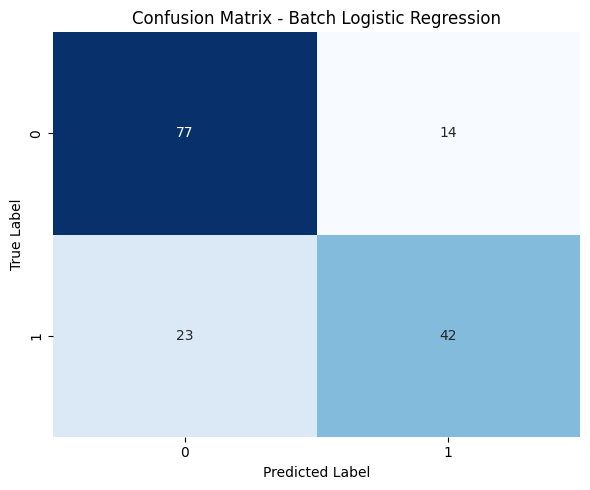

Coefficients (weights): [[-1.63179723e-01 -1.38071540e+00 -3.50026594e-04 -2.09040331e-01
   8.14046383e-02  1.08006354e-02  1.18256746e-02]]
Intercept (bias): [0.45558704]


In [ ]:
# Start timer
start_time = time.time()

# Initialize and train the model
# Using saga solver which is a variant of batch gradient descent
batch_lr = LogisticRegression(
    solver='saga',  # Saga is a variant of gradient descent
    penalty=None ,  # No regularization
    max_iter=10000,
    random_state=42
)
batch_lr.fit(X_train, y_train)

# Make predictions
y_pred_batch = batch_lr.predict(X_test)

# Calculate training time
batch_time = time.time() - start_time
print(f"Training time: {batch_time:.2f} seconds")

# Evaluate the model
evaluate_model(y_test, y_pred_batch, "Batch Logistic Regression")

# Display coefficients and intercept
print("Coefficients (weights):", batch_lr.coef_)
print("Intercept (bias):", batch_lr.intercept_)

### 2. Ridge Regularization (L2)


Training time: 0.78 seconds
=== Ridge Logistic Regression Performance ===
Accuracy: 0.7692

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        91
           1       0.76      0.65      0.70        65

    accuracy                           0.77       156
   macro avg       0.77      0.75      0.76       156
weighted avg       0.77      0.77      0.77       156



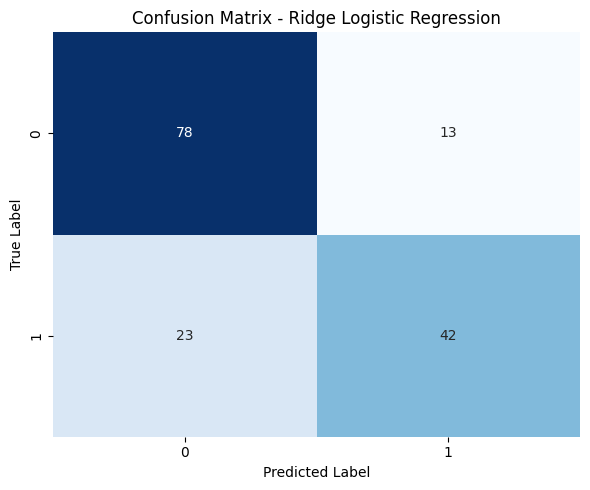

Coefficients (weights): [[-1.63491381e-01 -1.34892088e+00 -5.47101302e-04 -2.06155880e-01
   8.21441082e-02  1.07883798e-02  9.71182317e-03]]
Intercept (bias): [0.44601078]


In [ ]:
# Start timer
start_time = time.time()

# Initialize and train the model with L2 regularization
ridge_lr = LogisticRegression(
    penalty='l2',  # L2 regularization (Ridge)
    C=1.0,  # Inverse of regularization strength (lambda_ = 1/C)
    solver='saga',  # Using the same solver for fair comparison
    max_iter=10000,
    random_state=42
)
ridge_lr.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_lr.predict(X_test)

# Calculate training time
ridge_time = time.time() - start_time
print(f"Training time: {ridge_time:.2f} seconds")

# Evaluate the model
evaluate_model(y_test, y_pred_ridge, "Ridge Logistic Regression")

# Display coefficients and intercept
print("Coefficients (weights):", ridge_lr.coef_)
print("Intercept (bias):", ridge_lr.intercept_)

### 3. Stochastic Gradient Descent (SGD)


Training time: 0.01 seconds
=== SGD Logistic Regression Performance ===
Accuracy: 0.7756

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        91
           1       0.74      0.71      0.72        65

    accuracy                           0.78       156
   macro avg       0.77      0.77      0.77       156
weighted avg       0.77      0.78      0.77       156



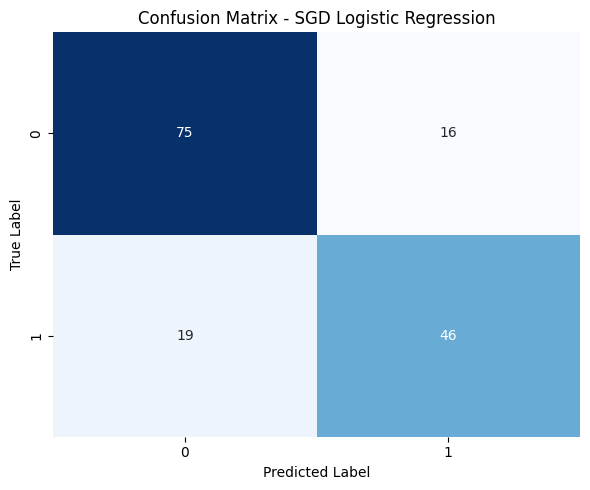

Coefficients (weights): [[-0.64467636 -1.06988589 -0.3061522  -0.24053677 -0.00164628  0.16445809
  -0.18525627]]
Intercept (bias): [-0.40213457]


In [ ]:
# Start timer
start_time = time.time()

# Initialize and train the model with SGD
sgd_lr = SGDClassifier(
    loss='log_loss',  # Log loss for logistic regression
    penalty=None,  # No regularization
    max_iter=1000,
    learning_rate='constant',
    eta0=0.001,  # Learning rate
    random_state=42
)
sgd_lr.fit(X_train_scaled, y_train)  # Using scaled features for SGD

# Make predictions
y_pred_sgd = sgd_lr.predict(X_test_scaled)

# Calculate training time
sgd_time = time.time() - start_time
print(f"Training time: {sgd_time:.2f} seconds")

# Evaluate the model
evaluate_model(y_test, y_pred_sgd, "SGD Logistic Regression")

# Display coefficients and intercept
print("Coefficients (weights):", sgd_lr.coef_)
print("Intercept (bias):", sgd_lr.intercept_)

## Performance Comparison

Let's compare the performance metrics and training times of all three approaches.

In [ ]:
# Compare accuracies
batch_accuracy = accuracy_score(y_test, y_pred_batch)
ridge_accuracy = accuracy_score(y_test, y_pred_ridge)
sgd_accuracy = accuracy_score(y_test, y_pred_sgd)

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Batch Gradient Descent', 'Ridge (L2 Regularization)', 'Stochastic Gradient Descent'],
    'Accuracy': [batch_accuracy, ridge_accuracy, sgd_accuracy],
    'Training Time (s)': [batch_time, ridge_time, sgd_time]
})

# Format the dataframe
comparison_df['Accuracy'] = comparison_df['Accuracy'].apply(lambda x: f"{x:.4f}")
comparison_df['Training Time (s)'] = comparison_df['Training Time (s)'].apply(lambda x: f"{x:.2f}")

# Display the comparison
print("Model Performance Comparison:")
comparison_df

Model Performance Comparison:


,Model,Accuracy,Training Time (s)
0,Batch Gradient Descent,0.7628,1.72
1,Ridge (L2 Regularization),0.7692,0.78
2,Stochastic Gradient Descent,0.7756,0.01


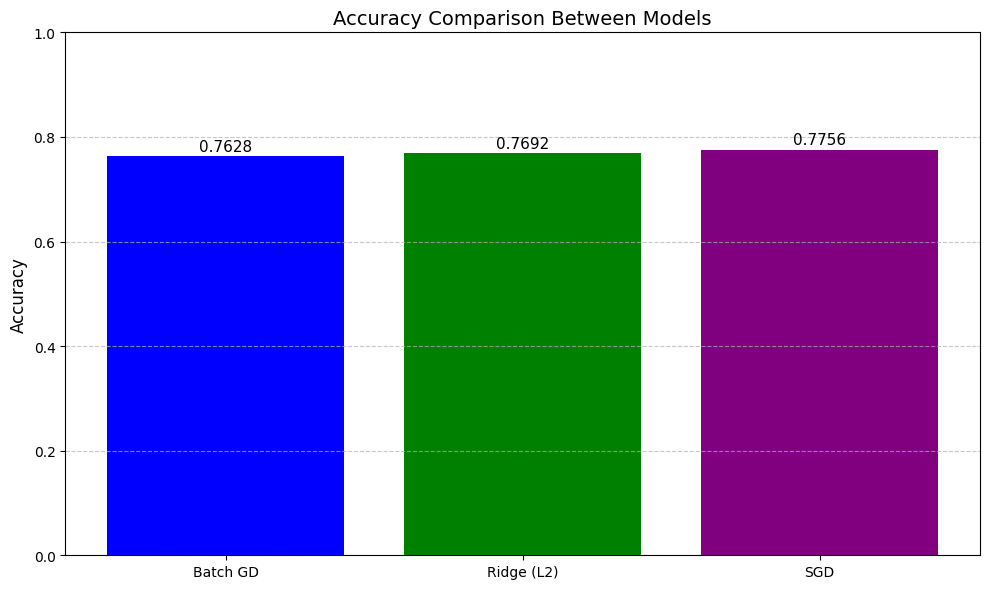

In [ ]:
# Visualize accuracy comparison
plt.figure(figsize=(10, 6))
models = ['Batch GD', 'Ridge (L2)', 'SGD']
accuracies = [batch_accuracy, ridge_accuracy, sgd_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'purple'])
plt.title('Accuracy Comparison Between Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

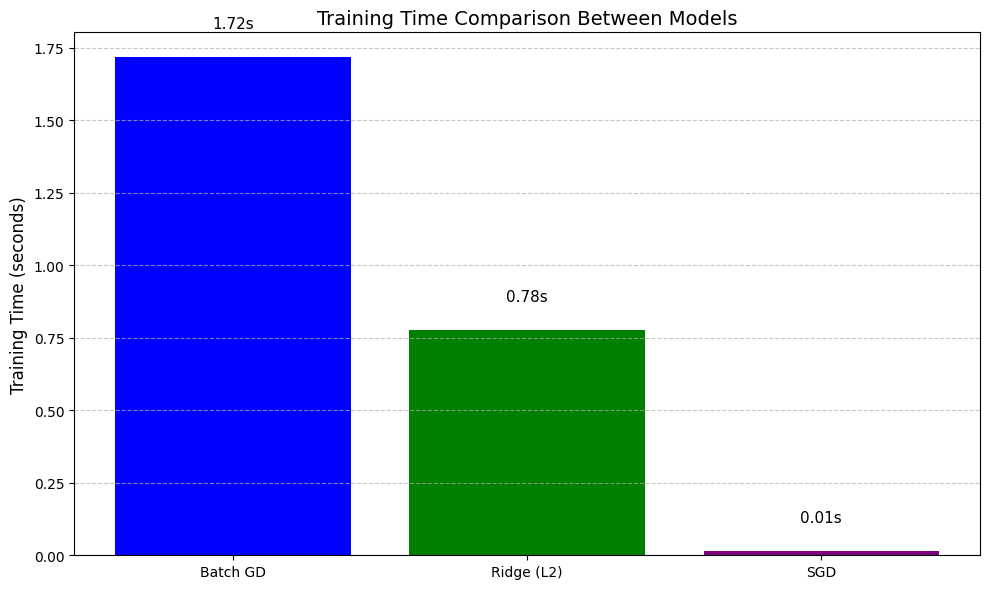

In [ ]:
# Visualize training time comparison
plt.figure(figsize=(10, 6))
times = [batch_time, ridge_time, sgd_time]

plt.bar(models, times, color=['blue', 'green', 'purple'])
plt.title('Training Time Comparison Between Models', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add time values on top of bars
for i, t in enumerate(times):
    plt.text(i, t + 0.1, f"{t:.2f}s", ha='center', fontsize=11)

plt.tight_layout()
plt.show()